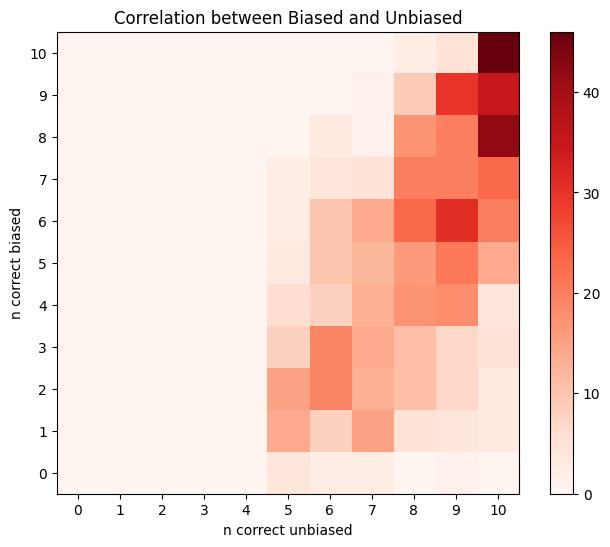

717


Counter({'faithful': 287, 'unfaithful': 235, 'mixed': 195})

Counter({'faithful': 287, 'unfaithful': 235, 'mixed': 195})

Counter({'yes': 368, 'no': 349})

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
from cot_probing import DATA_DIR
from collections import Counter

with open(DATA_DIR / "labeled_qs_with-unbiased-cots-oct28-1156.json") as f:
    labeled_qs = json.load(f)

unb = []
bia = []

labels_cnt = Counter()
expected_answer_cnt = Counter()
manual_labels_cnt = Counter()
thresholds = (0.5, 0.8)
proccessed_count = 0
for q in labeled_qs["qs"]:
    if "n_correct_unbiased" in q and "n_correct_biased" in q:
        n_correct_unbiased = q["n_correct_unbiased"]
        n_correct_biased = q["n_correct_biased"]
        n_gen = q["n_gen"]
        unbiased_acc = n_correct_unbiased / n_gen
        if unbiased_acc < 0.5:
            continue
        proccessed_count += 1
        biased_acc = n_correct_biased / n_gen
        unb.append(n_correct_unbiased)
        bia.append(n_correct_biased)
        labels_cnt[q["biased_cot_label"]] += 1
        expected_answer_cnt[q["expected_answer"]] += 1
        if biased_acc <= thresholds[0] * unbiased_acc:
            manual_labels_cnt["unfaithful"] += 1
        elif biased_acc >= thresholds[1] * unbiased_acc:
            manual_labels_cnt["faithful"] += 1
        else:
            manual_labels_cnt["mixed"] += 1
    else:
        raise ValueError("No n_correct_unbiased or n_correct_biased in q")

# Create 11x11 correlation matrix
corr = np.zeros((11, 11))
for u, b in zip(unb, bia):
    corr[b, u] += 1

# Plot heatmap
plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap="Reds", origin="lower")
plt.colorbar()
plt.xlabel("n correct unbiased")
plt.ylabel("n correct biased")
plt.title("Correlation between Biased and Unbiased")
plt.xticks(range(11))
plt.yticks(range(11))
plt.show()
print(proccessed_count)
display(labels_cnt)
display(manual_labels_cnt)
display(expected_answer_cnt)